In [1]:
using CPTVCA
using ExactDiagonalization
using QuantumLattices
using Distributed
using Plots

In [2]:
unitcell = Lattice([0, 0]; vectors=[[1, 0],[0, 1]])
cluster = Lattice(unitcell,(2,2),('p','p'))
hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
cons= Conservation(4, 1//2; np=4, sz=0)
t = Hopping(:t, Complex(-1.0), 1)
U = Hubbard(:U, Complex(0.0))
μ = Onsite(:μ, Complex(-0.0))
origiterms = (t, U, μ)
t_r = Hopping(:t, Complex(-1.0), 1)
af = Onsite(:af, Complex(0.0), MatrixCoupling(:, FID, :, σ"z", :); amplitude=antiferro([π, π]))
referterms = (t_r, U, μ, af)

(Term{:Hopping, :t, ComplexF64, Int64, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:orbital, :spin)}}}}, Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:orbital, :spin)}}}}}, QuantumLattices.DegreesOfFreedom.TermAmplitude{Nothing}, QuantumLattices.DegreesOfFreedom.TermModulate{Val{true}, :t}}(-1.0 + 0.0im, 1, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:orbital, :spin)}}}}, Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,)

In [3]:
varparams = [(af = a,) for a in range(0,0.3,50)]
rz = ReciprocalZone(reciprocals(cluster.vectors); length=100)
neighbors = Neighbors(0=>0.0, 1=>1.0)

Neighbors{Int64, Float64} with 2 entries:
  0 => 0.0
  1 => 1.0

In [4]:
spawn(11)
@time vcas = pmap(param -> VCA(unitcell, cluster, hilbert, origiterms, referterms, cons, param; neighbors=neighbors, m=200), varparams)
#saveData(vcas, "./temp/squareL4_af.jls")
#vcas = loadData("./temp/squareL4_af.jls")
#@time gps = pmap(vca -> GrandPotential(vca, rz, real(Parameters(vca.refergenerator)[:U]/2)), vcas)
@time gps = pmap(vca -> GrandPotential(vca, rz, 0), vcas)
#saveData(gps, "./temp/squareL4af_gp.jls")
#gps = loadData("./temp/squareL4af_gp.jls")
g1 = [gp[1] for gp in gps]

      From worker 10:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 2:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 4:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 5:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 8:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 6:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`


      From worker 7:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 3:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 11:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 12:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 9:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`


 40.195092 seconds (9.35 M allocations: 543.097 MiB, 0.66% gc time, 6.63% compilation time: 0% of which was recompilation)


 73.401172 seconds (3.52 M allocations: 198.815 MiB, 0.06% gc time, 0.95% compilation time)


50-element Vector{Float64}:
 -1.6210722772163386
 -1.6210722794995718
 -1.6210722794995696
 -1.6210722794995704
 -1.6210722794995684
 -1.6210722794995716
 -1.621072279499574
 -1.6210722794995727
 -1.6210722794995664
 -1.6210722794995687
  ⋮
 -1.6210722788451526
 -1.621072278845147
 -1.621072278845153
 -1.6210722788451488
 -1.621072278845147
 -1.6210722788451513
 -1.6210722788451541
 -1.6210722788451508
 -1.6210722788451513

In [6]:
g2 = [gp[2] for gp in gps]

50-element Vector{Float64}:
 -0.4574131948435344
 -0.4593282642293541
 -0.46465241074855795
 -0.4722780346680901
 -0.4807817913917499
 -0.4888085673249425
 -0.4953168450629376
 -0.49965421790710646
 -0.5015148693908104
 -0.5008474817926964
  ⋮
  0.043995686657018154
  0.06596922333914317
  0.088028395398003
  0.11016790137144929
  0.1323828621649905
  0.15466877892355207
  0.1770214959981136
  0.1994371682914752
  0.22191223237754382

In [7]:
g3 = [gp[3] for gp in gps]

50-element Vector{Float64}:
  0.0
  0.0
 -8.881784197001252e-16
  8.881784197001252e-16
  8.881784197001252e-16
  0.0
  0.0
  0.0
 -8.881784197001252e-16
  8.881784197001252e-16
  ⋮
  0.0
  0.0
  0.0
 -8.881784197001252e-16
 -8.881784197001252e-16
  8.881784197001252e-16
  0.0
  0.0
  0.0

In [6]:
gses = [vca.solver.sysvals.gsenergy for vca in vcas]

50-element Vector{Float64}:
 -17.320234958271907
 -17.32131474325577
 -17.32451814993638
 -17.32974334552558
 -17.33683843773915
 -17.345621832240514
 -17.355901643498026
 -17.367490672121164
 -17.380215919217385
 -17.393923306966265
   ⋮
 -18.013058164321958
 -18.034523293584762
 -18.056044575976507
 -18.077619615545593
 -18.099246168792245
 -18.120922131679354
 -18.14264552803175
 -18.164414499152308
 -18.186227294498828

In [10]:
neighbors0 = Neighbors(0=>0.0)
@time vcas0 = pmap(param -> VCA(unitcell, cluster, hilbert, origiterms, referterms, cons, param; neighbors=neighbors0, m=200), varparams)
@time gps0 = pmap(vca -> GrandPotential(vca, rz, 0), vcas0)
g1 = [gp0[1] for gp0 in gps0]

  0.678298 seconds (899.64 k allocations: 94.934 MiB, 6.36% gc time, 5.05% compilation time)


 12.979016 seconds (345.99 k allocations: 37.488 MiB, 0.47% compilation time)


50-element Vector{Float64}:
 -3.999999999999995
 -4.000000000000042
 -3.999999999999903
 -3.9999999999999756
 -3.999999999999974
 -3.999999999999909
 -3.999999999999987
 -4.0
 -4.000000000000069
 -4.000000000000067
  ⋮
 -4.000000000000026
 -4.000000000000003
 -3.9999999999999423
 -3.999999999999992
 -3.9999999999999294
 -3.9999999999999383
 -4.000000000000063
 -4.000000000000031
 -4.000000000000023

In [11]:
g2 = [gp0[2] for gp0 in gps0]

50-element Vector{Float64}:
 -0.0
  0.024489795918201097
  0.04897959183712926
  0.0734693877551795
  0.09795918367354554
  0.12244897959216876
  0.1469387755102555
  0.17142857142855217
  0.195918367346668
  0.22040816326503132
  ⋮
  1.004081632652961
  1.02857142857143
  1.0530612244900581
  1.077551020408177
  1.1020408163268332
  1.1265306122451064
  1.151020408163012
  1.1755102040814858
  1.1999999999998732

In [12]:
g3 = [gp0[3] for gp0 in gps0]

50-element Vector{Float64}:
  0.0
  0.0
 -8.881784197001252e-16
  8.881784197001252e-16
  8.881784197001252e-16
  0.0
  0.0
  0.0
 -8.881784197001252e-16
  8.881784197001252e-16
  ⋮
  0.0
  0.0
  0.0
 -8.881784197001252e-16
 -8.881784197001252e-16
  8.881784197001252e-16
  0.0
  0.0
  0.0

In [6]:
gses0 = [vca.solver.sysvals.gsenergy for vca in vcas0]

50-element Vector{Float64}:
 -15.999999999999986
 -16.02448979591836
 -16.04897959183674
 -16.073469387755107
 -16.09795918367347
 -16.12244897959183
 -16.146938775510208
 -16.171428571428592
 -16.195918367346945
 -16.220408163265322
   ⋮
 -17.004081632653104
 -17.028571428571457
 -17.053061224489813
 -17.07755102040818
 -17.102040816326536
 -17.126530612244917
 -17.151020408163276
 -17.175510204081643
 -17.20000000000002

In [17]:
neighbors1 = Neighbors(1=>1.0)
@time vcas1 = pmap(param -> VCA(unitcell, cluster, hilbert, origiterms, referterms, cons, param; neighbors=neighbors1, m=200), varparams)
@time gps1 = pmap(vca -> GrandPotential(vca, rz, 0), vcas1)
g1 = [gp1[1] for gp1 in gps1]

  0.610521 seconds (960.88 k allocations: 100.764 MiB, 20.46% gc time, 7.07% compilation time)


 80.092107 seconds (384.43 k allocations: 38.646 MiB, 0.05% compilation time)


50-element Vector{Float64}:
 -1.6210722771736168
 -1.621072277173473
 -1.6210722772400366
 -1.621072277174236
 -1.6210722771979953
 -1.6210722771797288
 -1.6210722771997417
 -1.6210722771799886
 -1.62107227722877
 -1.6210722772760047
  ⋮
 -1.6210722771990365
 -1.621072277187448
 -1.6210722772227137
 -1.621072277172623
 -1.621072277201054
 -1.6210722771974169
 -1.6210722772272321
 -1.6210722771941006
 -1.621072277151002

In [15]:
g2 = [gp1[2] for gp1 in gps1]

50-element Vector{Float64}:
 -2.484289108785349
 -2.4842891089242323
 -2.4842891088053074
 -2.484289108922508
 -2.484289108982929
 -2.4842891087704753
 -2.4842891091162214
 -2.484289108697339
 -2.484289108939532
 -2.4842891089447754
  ⋮
 -2.4842891089940062
 -2.484289108802637
 -2.4842891087768626
 -2.4842891088650108
 -2.48428910869326
 -2.4842891087142878
 -2.4842891088723587
 -2.4842891086695253
 -2.4842891087468777

In [16]:
g3 =[gp1[3] for gp1 in gps1]

50-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
gses1 = [vca.solver.sysvals.gsenergy for vca in vcas1]

50-element Vector{Float64}:
 -3.999999999999992
 -3.999999999999992
 -3.999999999999991
 -3.999999999999993
 -3.999999999999991
 -3.999999999999994
 -4.0
 -3.999999999999994
 -4.0
 -3.9999999999999893
  ⋮
 -3.999999999999993
 -3.9999999999999947
 -3.999999999999991
 -4.000000000000001
 -3.999999999999993
 -3.999999999999991
 -4.0
 -3.9999999999999893
 -3.999999999999993

In [21]:
varparams = [(U = u, af = a) for u in [2,4,8,12,16], a in range(0, 0.3, 50)]
rz = ReciprocalZone(reciprocals(cluster.vectors); length=100)
spawn(11)
vcas = pmap(param -> VCA(unitcell, cluster, hilbert, origiterms, referterms, cons, param; neighbors=neighbors, m=200), varparams)
gps = pmap(vca -> GrandPotential(vca, rz, real(Parameters(vca.refergenerator)[:U]/2)), vcas)

      From worker 12:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`
      From worker 7:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 4:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 13:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`
      From worker 10:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 2:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 6:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 11:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 3:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 5:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 8:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


      From worker 9:	  Activating project at `C:\Users\ZYJok\code\mypackage\QuantumClusterTheory`


5×50 Matrix{Float64}:
 -1.03281   -1.04061   -1.05729   …  -1.1276    -1.12735   -1.12709
 -0.730227  -0.731821  -0.736286     -0.815596  -0.815435  -0.815266
 -0.444412  -0.445161  -0.447293     -0.491406  -0.491244  -0.491079
 -0.314028  -0.314762  -0.316802     -0.341809  -0.341632  -0.341455
 -0.241285  -0.242104  -0.244296     -0.259329  -0.25917   -0.259012

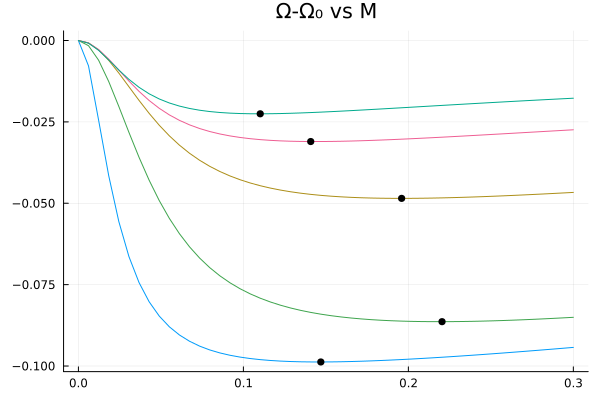

In [22]:
function plotgps(gps, M, L, N)
    f = plot(range(0, M, L), gps[1,:] .- maximum(gps[1,:]), label=nothing,legend=:topright, title="Ω-Ω₀ vs M")
    scatter!([range(0, M, L)[argmin(gps[1,:] .- maximum(gps[1,:]))]], [minimum(gps[1,:] .- maximum(gps[1,:]))], markercolor=:black, markersize=4, label=nothing)
    for i in 2:N
        plot!(range(0, M, L), gps[i,:] .- maximum(gps[i,:]), label=nothing,legend=:topright)
        scatter!([range(0, M, L)[argmin(gps[i,:] .- maximum(gps[i,:]))]], [minimum(gps[i,:] .- maximum(gps[i,:]))], markercolor=:black, markersize=4, label=nothing)
    end
    return f
end

plotgps(gps, 0.3, 50, 5)